## Domain – Chemical Industry
## focus – Classify chemical

#### Supervised Learning -  Decision Tree Classifier using Ada Boost

In [1]:
## Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading data from file into dataframe

df=pd.read_csv(r"./datasets/bio-degradabale-data.csv",sep=";",header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,NRB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1055 non-null   float64
 1   1       1055 non-null   float64
 2   2       1055 non-null   int64  
 3   3       1055 non-null   int64  
 4   4       1055 non-null   int64  
 5   5       1055 non-null   int64  
 6   6       1055 non-null   int64  
 7   7       1055 non-null   float64
 8   8       1055 non-null   int64  
 9   9       1055 non-null   int64  
 10  10      1055 non-null   int64  
 11  11      1055 non-null   float64
 12  12      1055 non-null   float64
 13  13      1055 non-null   float64
 14  14      1055 non-null   float64
 15  15      1055 non-null   int64  
 16  16      1055 non-null   float64
 17  17      1055 non-null   float64
 18  18      1055 non-null   int64  
 19  19      1055 non-null   int64  
 20  20      1055 non-null   int64  
 21  21      1055 non-null   float64
 22  

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


In [6]:
## apply get dummies function for encoding
df_result = pd.get_dummies(df,drop_first=True)

In [7]:
df_result.rename(columns={"41_RB":"41"},inplace=True)

In [8]:
df_result

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,0
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,0
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,0
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,0


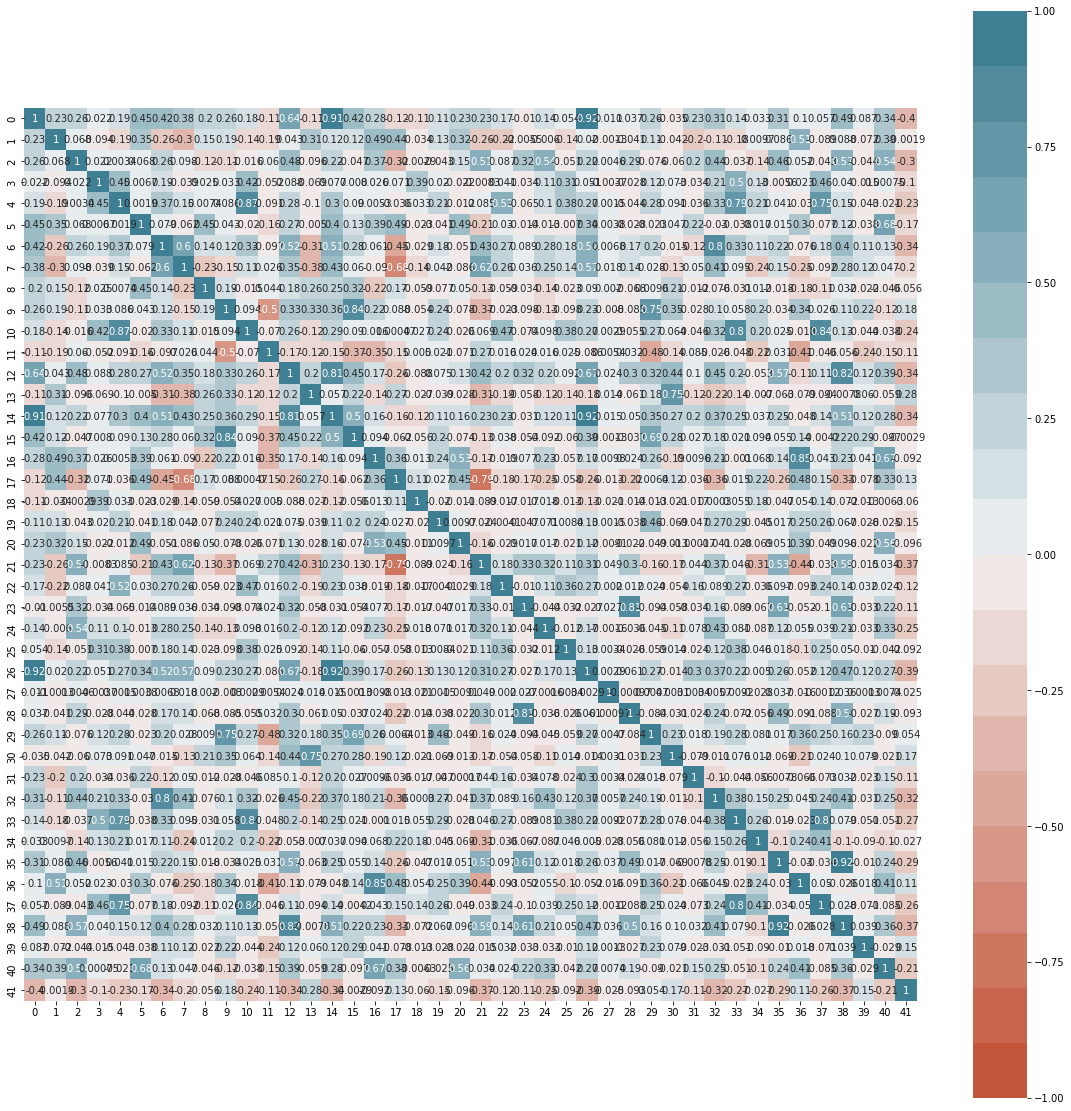

In [9]:
## Generating headmap for determining correlation
plt.figure(figsize = (20, 20))
sns.heatmap(data = df_result.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=20),
    square=True)
plt.show()

In [10]:
## These columns will be used for logistic regression

x_col = df_result.columns[:-1]
y_col = df_result.columns[-1]

In [11]:
X = df_result[x_col]
Y = df_result[y_col]

In [12]:
Y = np.squeeze(Y)

In [13]:
## importing test train split package
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=48)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(844, 41) (211, 41) (844,) (211,)


### Apply DecisionTree Classifer Algorithm

In [16]:
## importing Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier(criterion = "gini",random_state = 48,max_depth=3, min_samples_leaf=5)

In [18]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=48)

In [19]:
y_pred = dt.predict(X_test)

In [22]:
## importing accuracy functions
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [23]:
print(f"Decision Tree has training accuracy score of {round(accuracy_score(dt.predict(X_train), y_train),3)}")

Decision Tree has training accuracy score of 0.831


In [24]:
print(f"Decision Tree has testing accuracy score of {round(accuracy_score(y_test, y_pred),3)}")

Decision Tree has testing accuracy score of 0.844


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       140
           1       0.74      0.83      0.78        71

    accuracy                           0.84       211
   macro avg       0.82      0.84      0.83       211
weighted avg       0.85      0.84      0.85       211



In [26]:
from sklearn import tree

In [27]:
## Visualizing the tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_35 <= 3.68
|   |--- feature_33 <= 2.50
|   |   |--- feature_0 <= 4.99
|   |   |   |--- class: 1
|   |   |--- feature_0 >  4.99
|   |   |   |--- class: 0
|   |--- feature_33 >  2.50
|   |   |--- feature_12 <= 3.33
|   |   |   |--- class: 0
|   |   |--- feature_12 >  3.33
|   |   |   |--- class: 0
|--- feature_35 >  3.68
|   |--- feature_39 <= 0.50
|   |   |--- feature_38 <= 8.39
|   |   |   |--- class: 0
|   |   |--- feature_38 >  8.39
|   |   |   |--- class: 0
|   |--- feature_39 >  0.50
|   |   |--- feature_38 <= 9.06
|   |   |   |--- class: 1
|   |   |--- feature_38 >  9.06
|   |   |   |--- class: 0



### Apply AdaBoost on Decision Tree Classifier

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
## Defining Decision Tree Classifier
dt_ada = DecisionTreeClassifier(criterion = "gini",random_state = 48,max_depth=2, min_samples_leaf=7)

In [30]:
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=100, base_estimator=dt_ada,learning_rate=0.1)

In [31]:
model = abc.fit(X_train, y_train)

In [32]:
y_pred = model.predict(X_test)

In [33]:
print(f"Decision Tree has training accuracy score of {round(accuracy_score(model.predict(X_train), y_train),3)}")

Decision Tree has training accuracy score of 0.945


In [34]:
print(f"Decision Tree has testing accuracy score of {round(accuracy_score(y_test, y_pred),3)}")

Decision Tree has testing accuracy score of 0.891


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       140
           1       0.85      0.82      0.83        71

    accuracy                           0.89       211
   macro avg       0.88      0.87      0.88       211
weighted avg       0.89      0.89      0.89       211



## The basic Decision Treee Classifier model was overfitting with accuracy of 0.84
## The Decision Tree Model with AdaBoost is a better model with accuracy of 0.89